# __Part 1 - Communicate Data Findings (prosperLoanData Dataset)__
### _by Abdullah Akintobi_

## Introduction to the Dataset

This document explores a dataset containing 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

This [data dictionary](https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&source=editors&ust=1665220514781400&usg=AOvVaw0mbCX0QoSuKKEAgUIcVFbb) explains all the variables in the dataset.

I will not explore all of the variables in the dataset. I want to focus my exploration on 12 of them. All the variables I will be involving in my analysis are explained below.

### Description of the column variables
01 - LoanNumber 

Unique numeric value associated with the loan.

02 - Term 

The length of the loan expressed in months.

03 - LoanStatus

The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.

04 - IncomeVerifiable

The borrower indicated they have the required documentation to support their income.

05 - BorrowerRate 

The Borrower's interest rate for this loan.

06 - BorrowerState

The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.

07 - StatedMonthlyIncome

The monthly income the borrower stated at the time the listing was created.

08 - LoanOriginalAmount

The origination amount of the loan.

09 - LoanOriginationDate

The date the loan was originated.

10 - LoanOriginationQuarter

The quarter in which the loan was originated.

11 - MonthlyLoanPayment

The scheduled monthly loan payment.

12 - Investors

The number of investors that funded the loan.


## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

%matplotlib inline

In [2]:
# Load in the dataset into a pandas dataframe with specific columns (df_columns).
df_columns = [
    "LoanNumber",
    "Term",
    "LoanStatus",
    "BorrowerRate",
    "BorrowerState",
    "IncomeVerifiable",
    "StatedMonthlyIncome",
    "LoanOriginalAmount",
    "LoanOriginationDate",
    "LoanOriginationQuarter",
    "MonthlyLoanPayment",
    "Investors",
]
loan_data = pd.read_csv("prosperLoanData.csv", usecols=df_columns)
loan_data = loan_data.loc[:, df_columns]

In [3]:
# Preview the top 5 rows of the dataset
loan_data.head()

,LoanNumber,Term,LoanStatus,BorrowerRate,BorrowerState,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,Investors
0,19141,36,Completed,0.1580,CO,True,3083.333333,9425,2007-09-12 00:00:00,Q3 2007,330.43,258
1,134815,36,Current,0.0920,CO,True,6125.000000,10000,2014-03-03 00:00:00,Q1 2014,318.93,1
2,6466,36,Completed,0.2750,GA,True,2083.333333,3001,2007-01-17 00:00:00,Q1 2007,123.32,41
3,77296,36,Current,0.0974,GA,True,2875.000000,10000,2012-11-01 00:00:00,Q4 2012,321.45,158
4,102670,36,Current,0.2085,MN,True,9583.333333,15000,2013-09-20 00:00:00,Q3 2013,563.97,20


In [4]:
# Check the number of rows and columns in the dataset
loan_data.shape

(113937, 12)

In [5]:
# Check the properties of each and every columns of the dataset
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   LoanNumber              113937 non-null  int64  
 1   Term                    113937 non-null  int64  
 2   LoanStatus              113937 non-null  object 
 3   BorrowerRate            113937 non-null  float64
 4   BorrowerState           108422 non-null  object 
 5   IncomeVerifiable        113937 non-null  bool   
 6   StatedMonthlyIncome     113937 non-null  float64
 7   LoanOriginalAmount      113937 non-null  int64  
 8   LoanOriginationDate     113937 non-null  object 
 9   LoanOriginationQuarter  113937 non-null  object 
 10  MonthlyLoanPayment      113937 non-null  float64
 11  Investors               113937 non-null  int64  
dtypes: bool(1), float64(3), int64(4), object(4)
memory usage: 9.7+ MB


In [6]:
# Check number duplicate rows in the dataset
loan_data.duplicated().sum()

871

## Data Cleaning

In [7]:
# Drop duplicated rows
loan_data = loan_data.drop_duplicates()

In [8]:
# Comfirm changes
loan_data.shape

(113066, 12)

In [9]:
# Dataset info
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   LoanNumber              113066 non-null  int64  
 1   Term                    113066 non-null  int64  
 2   LoanStatus              113066 non-null  object 
 3   BorrowerRate            113066 non-null  float64
 4   BorrowerState           107551 non-null  object 
 5   IncomeVerifiable        113066 non-null  bool   
 6   StatedMonthlyIncome     113066 non-null  float64
 7   LoanOriginalAmount      113066 non-null  int64  
 8   LoanOriginationDate     113066 non-null  object 
 9   LoanOriginationQuarter  113066 non-null  object 
 10  MonthlyLoanPayment      113066 non-null  float64
 11  Investors               113066 non-null  int64  
dtypes: bool(1), float64(3), int64(4), object(4)
memory usage: 10.5+ MB


In [10]:
# Convert LoanOriginationDate to datetime64 datatype
loan_data["LoanOriginationDate"] = loan_data["LoanOriginationDate"].astype(
    "datetime64[ns]"
)

In [11]:
# Convert "StatedMonthlyIncome" to integer for analysis improvement
loan_data["StatedMonthlyIncome"] = loan_data["StatedMonthlyIncome"].astype(int)

In [12]:
# Convert "ListingNumber" to category datatype
loan_data["LoanNumber"] = loan_data["LoanNumber"].astype("category")

In [13]:
# Confirm all changes with ".info()"
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   LoanNumber              113066 non-null  category      
 1   Term                    113066 non-null  int64         
 2   LoanStatus              113066 non-null  object        
 3   BorrowerRate            113066 non-null  float64       
 4   BorrowerState           107551 non-null  object        
 5   IncomeVerifiable        113066 non-null  bool          
 6   StatedMonthlyIncome     113066 non-null  int64         
 7   LoanOriginalAmount      113066 non-null  int64         
 8   LoanOriginationDate     113066 non-null  datetime64[ns]
 9   LoanOriginationQuarter  113066 non-null  object        
 10  MonthlyLoanPayment      113066 non-null  float64       
 11  Investors               113066 non-null  int64         
dtypes: bool(1), category(1), datet

In [14]:
# Comfirm all changes visually
loan_data.sample(3)

,LoanNumber,Term,LoanStatus,BorrowerRate,BorrowerState,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,Investors
67344,54201,36,Defaulted,0.3199,TX,False,2916,2000,2011-10-06,Q4 2011,87.10,34
79699,43934,36,Chargedoff,0.2750,MA,True,6416,5000,2010-08-12,Q3 2010,205.47,133
76161,5838,36,Completed,0.0725,NaN,True,8750,1000,2006-12-22,Q4 2006,30.99,17


In [15]:
# Descriptive statistics for numeric variables
loan_data.describe()

,Term,BorrowerRate,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,Investors
count,113066.000000,113066.000000,1.130660e+05,113066.000000,113066.000000,113066.000000
mean,40.800170,0.192946,5.604801e+03,8314.762307,271.932742,80.876143
std,10.421518,0.074917,7.495589e+03,6237.007841,192.549979,103.340277
min,12.000000,0.000000,0.000000e+00,1000.000000,0.000000,1.000000
25%,36.000000,0.134000,3.199000e+03,4000.000000,130.950000,2.000000
50%,36.000000,0.184000,4.666000e+03,6300.000000,217.370000,44.000000
75%,36.000000,0.250600,6.824500e+03,12000.000000,370.570000,116.000000
max,60.000000,0.497500,1.750002e+06,35000.000000,2251.510000,1189.000000


### My main features of interest in the dataset
I'm most interested in figuring out the distribution of loans given to borrowers by Borrower's State and Loan Year

### The features in the dataset that I think will help support my investigation into my features of interest
I expect StatedMonthlyIncome and BorrowerState to really help me in my investigation as the borrower's stated income and state can affect how the loans are distributed

## Univariate Exploration

> In this section, I will investigate distributions of individual variables.

#### __Question__
> What is the distribution of loans with respect to month?

#### __Visualization__

In [16]:
# Check the number of times each months occurs
loan_data["Term"].value_counts()

36    87224
60    24228
12     1614
Name: Term, dtype: int64

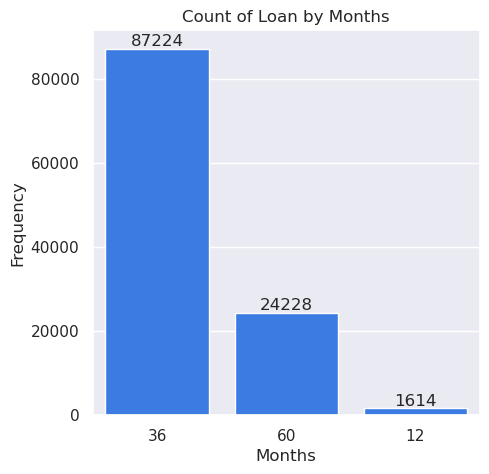

In [17]:
# Plot a bar chart of Months againt its frequency
sns.set(rc={"figure.figsize": (5, 5)})
pl = sns.countplot(
    data=loan_data,
    x="Term",
    order=loan_data["Term"].value_counts().index,
    color="#1F75FE",
)
plt.xlabel("Months")
plt.ylabel("Frequency")
plt.title("Count of Loan by Months")
pl.bar_label(pl.containers[0]);

#### __Observations__

> It is observed from the above visualization that 87,224 loans were to be paid back by borrower in 36 months (3 years) while 24,228 loans were be paid back in 60 months (5 years) and 1,614 loans were be paid back in 12 months (a year). This will help us later to discover if term have effect in loan pay back.

#### __Question__
> What is the distribution of LoanStatus?

#### __Visualization__

In [18]:
# Check the number of times each months occurs
loan_data["LoanStatus"].value_counts()

Current                   55730
Completed                 38061
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        800
Past Due (31-60 days)       361
Past Due (61-90 days)       311
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      203
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

>__I would like to change all Past Due (with day range) to just "Past Due" (since they describes the same loan status) and also change "FinalPaymentInProgress" to "InProgress" in order to make my visualization more readable__

In [19]:
# Define a function that changes Past Due (with day range) to just "Past Due"
def change_text(x):
    past_position = x.find("Past")
    # If not Past Due
    if past_position == -1:
        x = x
    else:  # Change to Past Due
        x = x[0:8]
    return x

In [20]:
# Remove links from text with our remove_link function
loan_data["LoanStatus"] = loan_data["LoanStatus"].apply(change_text)

In [21]:
# Change "FinalPaymentInProgress" to "InProgress"
loan_data["LoanStatus"] = loan_data["LoanStatus"].str.replace(
    "FinalPaymentInProgress", "InProgress"
)

In [22]:
# Confirm all changes
loan_data["LoanStatus"].value_counts()

Current       55730
Completed     38061
Chargedoff    11992
Defaulted      5018
Past Due       2057
InProgress      203
Cancelled         5
Name: LoanStatus, dtype: int64

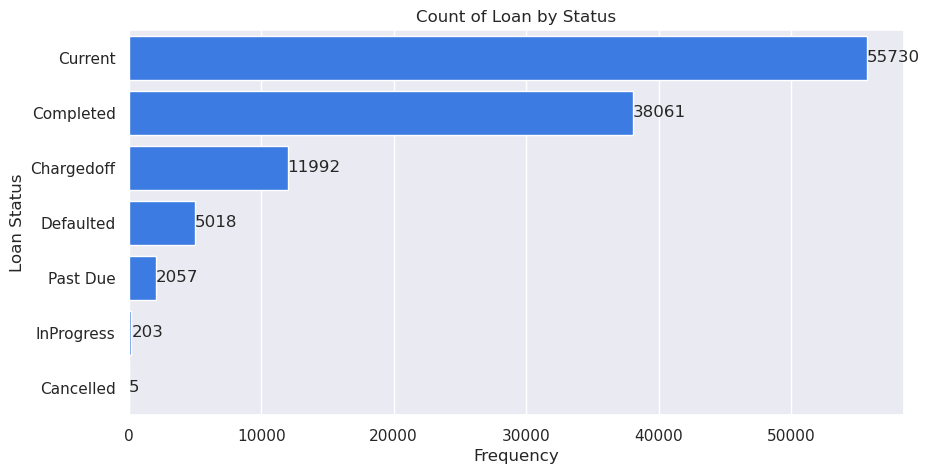

In [23]:
# Plot a bar chart of Months againt its frequency
sns.set(rc={"figure.figsize": (10, 5)})
pl = sns.countplot(
    data=loan_data,
    y="LoanStatus",
    order=loan_data["LoanStatus"].value_counts().index,
    color="#1F75FE",
)
plt.xlabel("Frequency")
plt.ylabel("Loan Status")
plt.title("Count of Loan by Status")
pl.bar_label(pl.containers[0]);

In [24]:
# Check the percentage of each status to 3 decimal place
# Loan Status in array
names = loan_data["LoanStatus"].value_counts().index
# Each loan status count in array
values = loan_data["LoanStatus"].value_counts().values
# Total Loan status count
sum_values = loan_data["LoanStatus"].value_counts().sum()
# Percentage of each loan status count in array
precent = [round((value / sum_values) * 100, 3) for value in values]
# While loop that prints the proportion of each status
x = 0
while x < len(names):
    print(f"The proportion of {names[x]} is {precent[x]}%")
    x += 1

The proportion of Current is 49.29%
The proportion of Completed is 33.663%
The proportion of Chargedoff is 10.606%
The proportion of Defaulted is 4.438%
The proportion of Past Due is 1.819%
The proportion of InProgress is 0.18%
The proportion of Cancelled is 0.004%


#### __Observations__

> From the above analysis and visualization there are 55730 Current loans, 38061 Completed loans, 11992 Charged off loans, 5018 Defaulted loans, 2057 Past Due loans, 203 loan final payment in progress and 5 Cancelled loans status.
Also, approximately 10.606% of the loan status is Chargedoff which is a bit high as just approximately 33.663% loans are completed, which proved that most borrowed has missed payments for several months leading to creditor giving up trying to collect the payments.

#### __Question__
> What is the Borrower's rate range and what's range occur the most?

#### __Visualization__

In [25]:
# Check descriptive statistics of "BorrowerRate" column
loan_data["BorrowerRate"].describe()

count    113066.000000
mean          0.192946
std           0.074917
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250600
max           0.497500
Name: BorrowerRate, dtype: float64

In [26]:
# Print the highest and lowest rates in "BorrowerRate" column
rate_max = loan_data.BorrowerRate.max()
rate_min = loan_data.BorrowerRate.min()
print(f"The highest borrow rate is {rate_max} while the lowest is {rate_min}")

The highest borrow rate is 0.4975 while the lowest is 0.0


In [27]:
# Print the most occured rate in "BorrowerRate" column
rate = loan_data.BorrowerRate.value_counts().index[0]
freq = loan_data.BorrowerRate.value_counts().values[0]
print(f"{rate} is the most occured rate with {freq} frequency")

0.3177 is the most occured rate with 3672 frequency


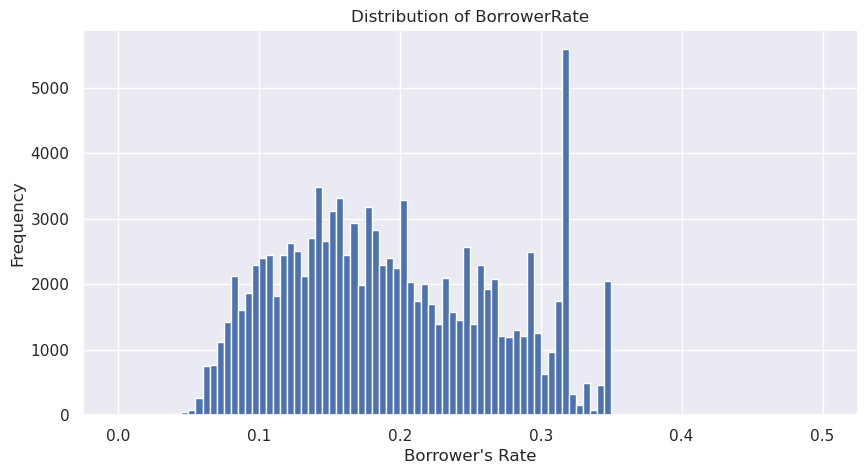

In [28]:
# Plot Histogram of BorrowerRate
binsize = 0.005
bins = np.arange(0, loan_data["BorrowerRate"].max() + binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(
    data=loan_data,
    x="BorrowerRate",
    bins=bins,
)
plt.xlabel("Borrower's Rate")
plt.ylabel("Frequency")
plt.title("Distribution of BorrowerRate");

> It's observed from the above histogram that there are some outliers above the 0.4 rate. I would investigate that with a box plot.

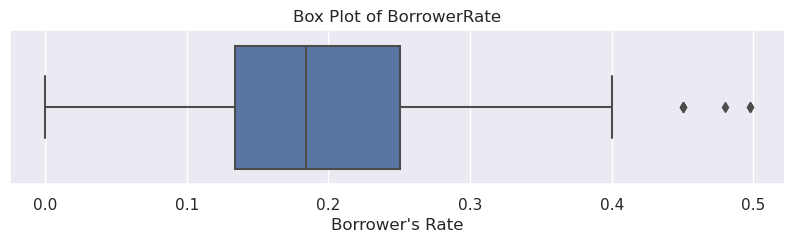

In [29]:
# Plot BorrowerRate box plot
sns.set(rc={"figure.figsize": (10, 2)})
sns.boxplot(x=loan_data["BorrowerRate"])
plt.xlabel("Borrower's Rate")
plt.title("Box Plot of BorrowerRate");

In [30]:
# Check the outliers
sorted(loan_data[loan_data["BorrowerRate"] > 0.4]["BorrowerRate"].unique())

[0.45, 0.48, 0.4975]

#### __Observations__

> From the visualization above, the borrower's rate ranges from 0 to 0.4975 inclusive and rate 0.3177 is the most occured rate with 3672 frequency. There are also outliers in the column (0.45, 0.48 and 0.4975).

#### __Question__
> What is the distribution of loan by state?

#### __Visualization__

In [31]:
# Check all states that applied for loans
loan_data["BorrowerState"].unique()

array(['CO', 'GA', 'MN', 'NM', 'KS', 'CA', 'IL', 'MD', nan, 'AL', 'AZ',
       'VA', 'FL', 'PA', 'OR', 'MI', 'NY', 'LA', 'WI', 'OH', 'NC', 'WA',
       'NV', 'NJ', 'TX', 'AR', 'SC', 'DE', 'MO', 'NE', 'UT', 'DC', 'MA',
       'CT', 'IN', 'KY', 'OK', 'MS', 'WV', 'RI', 'TN', 'ID', 'MT', 'HI',
       'NH', 'VT', 'WY', 'ME', 'AK', 'IA', 'SD', 'ND'], dtype=object)

In [32]:
# Check the number states by loans
len(loan_data["BorrowerState"].unique()) - 1

51

In [33]:
# Check the number loans with state not specified
loan_data[loan_data["BorrowerState"].isnull()]["BorrowerState"].isnull().sum()

5515

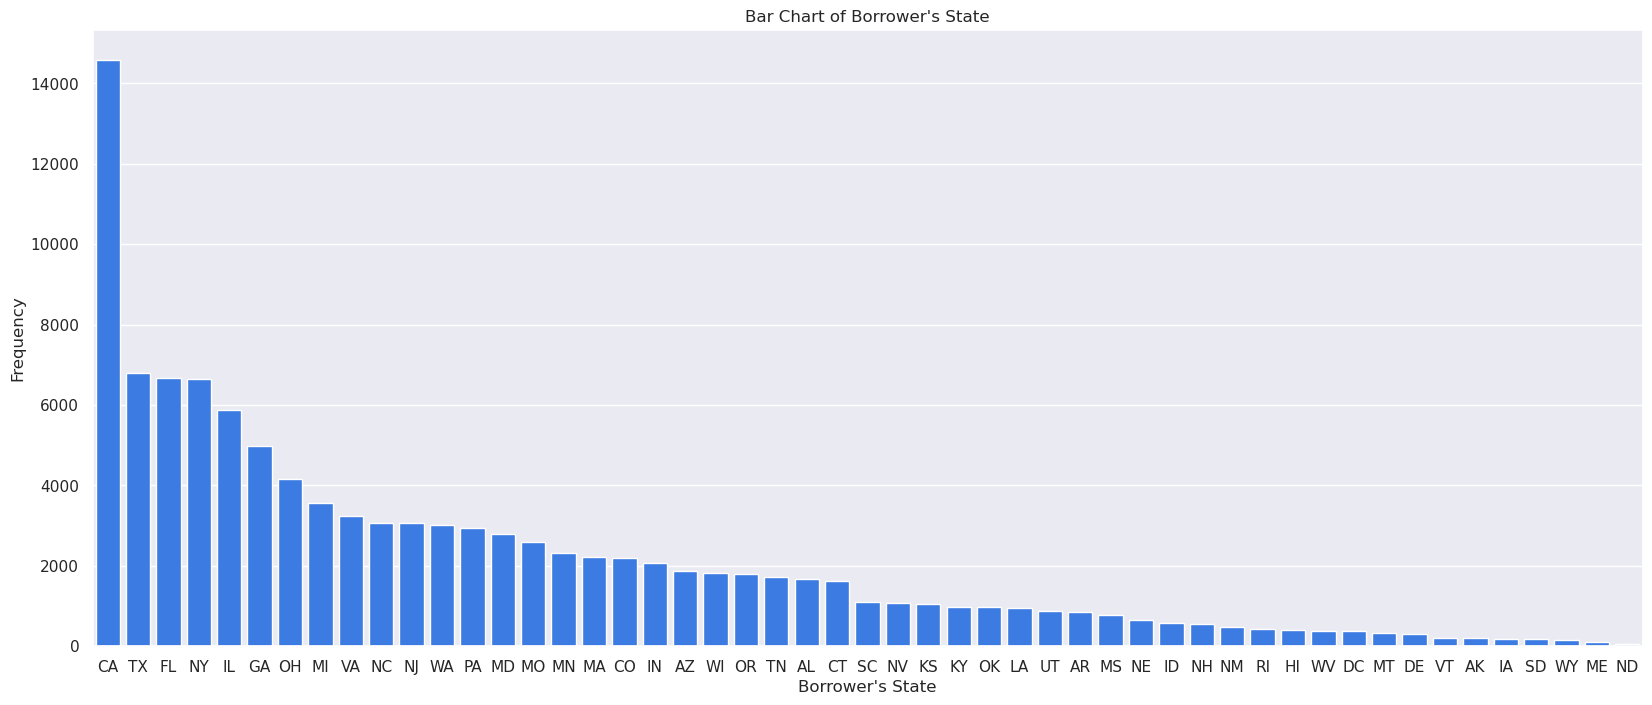

In [34]:
# Plot Borrower's State Bar Chart
sns.set(rc={"figure.figsize": (20, 8)})
sns.countplot(
    data=loan_data,
    x="BorrowerState",
    order=loan_data["BorrowerState"].value_counts().index,
    color="#1F75FE",
)
plt.xlabel("Borrower's State")
plt.ylabel("Frequency")
plt.title("Bar Chart of Borrower's State");

In [35]:
# Calculate and print the percenage of loans from CA
total_loan = loan_data.shape[0]
CA_in_BorrowerState = loan_data[loan_data["BorrowerState"] == "CA"]["BorrowerState"]
CA_loan = CA_in_BorrowerState.value_counts()[0]
CA_percentage = round((CA_loan / total_loan) * 100, 2)
print(f"Approximately, {CA_percentage}% of the loans are from California.")

Approximately, 12.91% of the loans are from California.


In [36]:
# The total number of loans from CA
loan_data[loan_data["BorrowerState"] == "CA"]["BorrowerState"].value_counts()

CA    14594
Name: BorrowerState, dtype: int64

#### __Observations__

> From the above visualization, it is observed that most of the borrowers amounting to 14594 loans are from CA (California) and occupies approximately, 12.91% of the loans. Also, there are 5515 loans that the borrower doesn't specify his/her state.

#### __Question__
> What is the distribution of Income Verification?

#### __Visualization__

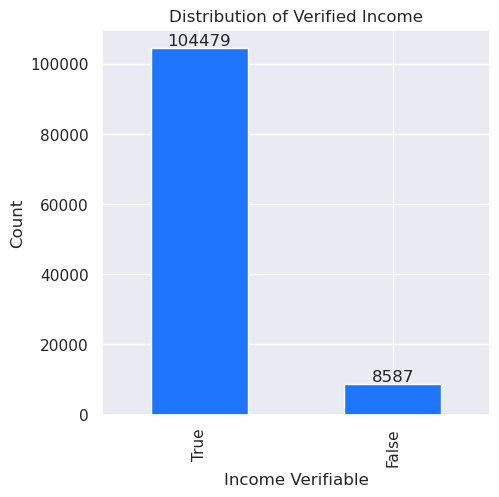

In [37]:
# Check the distribution of Income Verification
pl = (
    loan_data["IncomeVerifiable"]
    .value_counts()
    .plot(
        kind="bar",
        figsize=(5, 5),
        color="#1F75FE",
        xlabel="Income Verifiable",
        ylabel="Count",
        title="Distribution of Verified Income",
    )
)
pl.bar_label(pl.containers[0]);

In [38]:
# Check the percentage of Income Verifiable to 3 decimal place
# Income Verifiable in array
names = loan_data["IncomeVerifiable"].value_counts().index
# Each Income Verifiable count in array
values = loan_data["IncomeVerifiable"].value_counts().values
# Total Income Verifiable count
sum_values = loan_data["IncomeVerifiable"].value_counts().sum()
# Percentage of each Income Verifiable count in array
precent = [round((value / sum_values) * 100, 3) for value in values]
# While loop that prints the proportion of each Verified Income status
x = 0
while x < len(names):
    print(f"The proportion of {names[x]} is {precent[x]}%")
    x += 1

The proportion of True is 92.405%
The proportion of False is 7.595%


#### __Observations__

> From the visualization, the number of verified loans is 104479 and 8587 is unverified. There are approximated proportion of verified loans is 92.405% and 7.595% of unverified loans.

#### __Question__
> What is the distribution of the borrower Stated Monthly Income?

#### __Visualization__

In [39]:
# Check descriptive statistics of "BorrowerRate" column
loan_data["StatedMonthlyIncome"].describe()

count    1.130660e+05
mean     5.604801e+03
std      7.495589e+03
min      0.000000e+00
25%      3.199000e+03
50%      4.666000e+03
75%      6.824500e+03
max      1.750002e+06
Name: StatedMonthlyIncome, dtype: float64

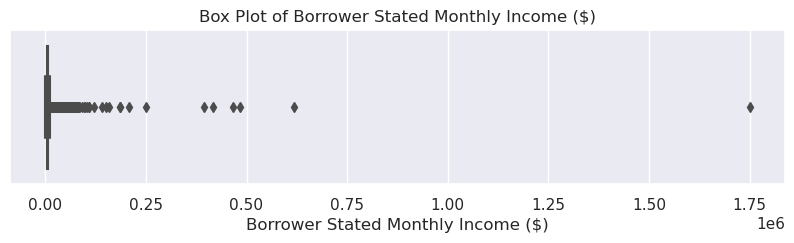

In [40]:
# Plot StatedMonthlyIncome box plot
sns.set(rc={"figure.figsize": (10, 2)})
sns.boxplot(x=loan_data["StatedMonthlyIncome"])
plt.xlabel("Borrower Stated Monthly Income ($)")
plt.title("Box Plot of Borrower Stated Monthly Income ($)");

> This box plot shows there are lots of outliers in the Borrower Stated Monthly Income.

In [41]:
# Check the first 10 outliers in "StatedMonthlyIncome" column
sorted(
    loan_data["StatedMonthlyIncome"][
        (np.abs(stats.zscore(loan_data["StatedMonthlyIncome"])) > 3)
    ]
)[:10]

[28333, 28333, 28333, 28333, 28333, 28333, 28333, 28333, 28333, 28333]

In [42]:
# Check the last 8 outliers in "StatedMonthlyIncome" column
sorted(
    loan_data["StatedMonthlyIncome"][
        (np.abs(stats.zscore(loan_data["StatedMonthlyIncome"])) > 3)
    ]
)[-8:]

[208333, 250000, 394400, 416666, 466666, 483333, 618547, 1750002]

> From the above last 8 outliers, there's a wide differences between the incomes. I would investigate them further.

In [43]:
# Check outliers above 185081
loan_data[loan_data["StatedMonthlyIncome"] > 185081]

,LoanNumber,Term,LoanStatus,BorrowerRate,BorrowerState,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,Investors
8066,48719,36,Completed,0.3199,IL,True,416666,2000,2011-04-26,Q2 2011,87.10,10
8870,5368,36,Chargedoff,0.1200,CT,True,208333,12500,2006-12-12,Q4 2006,415.18,105
17411,49178,36,Completed,0.3199,HI,True,483333,7500,2011-05-06,Q2 2011,326.62,128
53014,82437,12,Completed,0.1795,CA,False,618547,4000,2013-01-23,Q1 2013,366.62,93
53167,60925,36,Current,0.3177,OR,False,1750002,4000,2012-02-24,Q1 2012,173.71,2
57133,48269,36,Current,0.3199,CT,True,466666,4000,2011-04-05,Q2 2011,174.20,72
82831,74544,36,Current,0.2710,WA,False,250000,4000,2012-09-21,Q3 2012,163.52,6
113270,85765,36,Current,0.1899,CA,True,394400,2000,2013-02-26,Q1 2013,73.30,26


>From my investigation, I noticed that most of the Borrower Stated Monthly Income are not correct. For instance, how could an individual who makes `$1,750,002` per month borrow a loan of `$4000` and find it difficult to pay back the loan (row 53167 in the dataset). Also, the two largest outliers (618547 and 1750002) are not verified, which shows they might be false. There are also probably other false monthly income but I would only replace the `$1,750,002` monthly income to `$175,000` because I don't have enough evidence to back others up but the 1,750,000 dollars income is too deceitful. 

In [44]:
# Replace 1,750,002 monthly income to $175,000 to make my histogram more readable.
loan_data["StatedMonthlyIncome"] = loan_data["StatedMonthlyIncome"].replace(
    1750002, 175000
)

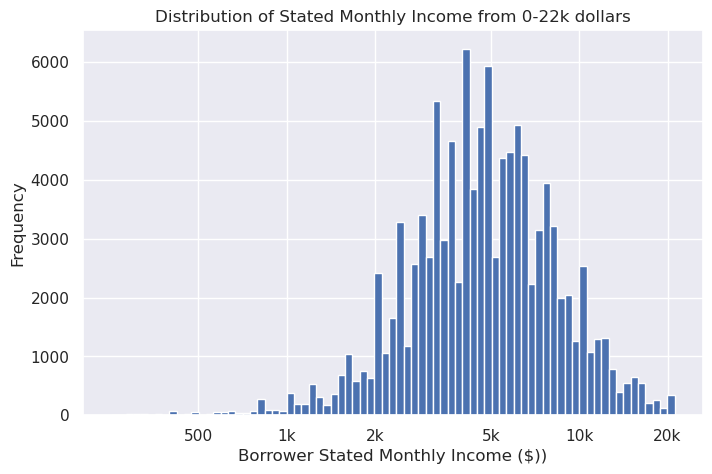

In [45]:
# Histogram of Stated Monthly Income from 0-22k dollars on a log scale
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(20000) + log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=loan_data, x="StatedMonthlyIncome", bins=bins)
plt.xscale("log")
plt.ylabel("Frequency")
plt.title("Distribution of Stated Monthly Income from 0-22k dollars")
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, "1k", "2k", "5k", "10k", "20k"])
plt.xlabel("Borrower Stated Monthly Income ($))");

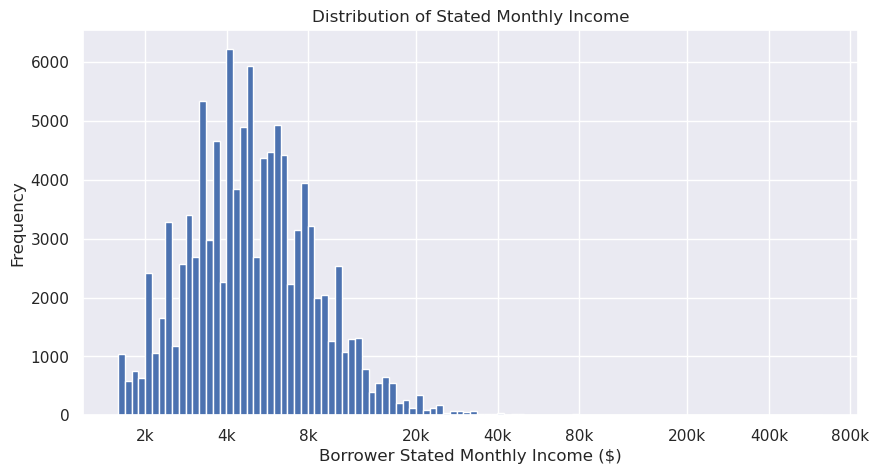

In [46]:
# Histogram of all Stated Monthly Income in dollars on a log scale
log_binsize = 0.025
bins = 10 ** np.arange(
    3.2, np.log10(loan_data["StatedMonthlyIncome"].max()) + log_binsize, log_binsize
)

plt.figure(figsize=[10, 5])
plt.hist(data=loan_data, x="StatedMonthlyIncome", bins=bins)
plt.xscale("log")
plt.ylabel("Frequency")
plt.title("Distribution of Stated Monthly Income")
plt.xticks(
    [2e3, 4e3, 8e3, 2e4, 4e4, 8e4, 2e5, 4e5, 8e5],
    ["2k", "4k", "8k", "20k", "40k", "80k", "200k", "400k", "800k"],
)
plt.xlabel("Borrower Stated Monthly Income ($)");

#### __Observations__

> From the above visualization, it is observed that most of the borrowers stated monthly income are from 3k to 6k. There are also a lots of outliers in the data set with a wide range between the outliers. Also, when the dataset was investigated further, it was observered that most of the borrowers monthly income are false.

#### __Question__
> What is the distribution of the Loan Original Amount?

#### __Visualization__

In [47]:
# Check descriptive statistics of "BorrowerRate" column
loan_data["LoanOriginalAmount"].describe()

count    113066.000000
mean       8314.762307
std        6237.007841
min        1000.000000
25%        4000.000000
50%        6300.000000
75%       12000.000000
max       35000.000000
Name: LoanOriginalAmount, dtype: float64

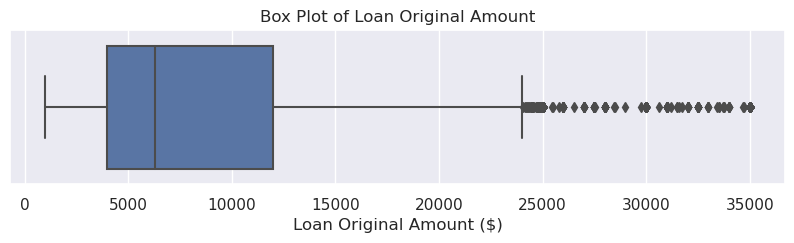

In [48]:
# Plot BorrowerRate box plot
sns.set(rc={"figure.figsize": (10, 2)})
sns.boxplot(x=loan_data["LoanOriginalAmount"])
plt.xlabel("Loan Original Amount ($)")
plt.title("Box Plot of Loan Original Amount");

In [49]:
# Check the first 10 outliers in "LoanOriginalAmount" column
sorted(
    loan_data["LoanOriginalAmount"][
        (np.abs(stats.zscore(loan_data["LoanOriginalAmount"])) > 3)
    ]
)[:10]

[27500, 27500, 27500, 27500, 27500, 27500, 27500, 27500, 27500, 27500]

In [50]:
# Check the last 10 outliers in "LoanOriginalAmount" column
sorted(
    loan_data["LoanOriginalAmount"][
        (np.abs(stats.zscore(loan_data["LoanOriginalAmount"])) > 3)
    ]
)[-10:]

[35000, 35000, 35000, 35000, 35000, 35000, 35000, 35000, 35000, 35000]

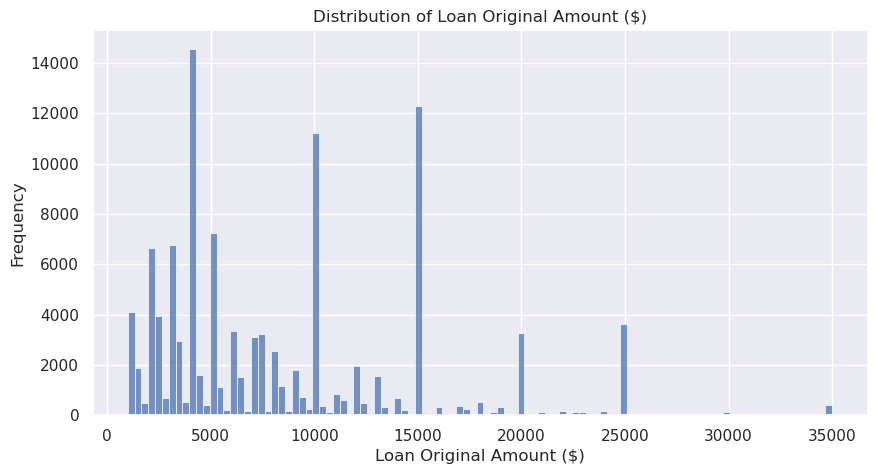

In [51]:
# Plot the loan original amount histogram
sns.set(rc={"figure.figsize": (10, 5)})
sns.histplot(data=loan_data, x="LoanOriginalAmount")
plt.ylabel("Frequency")
plt.xlabel("Loan Original Amount ($)")
plt.title("Distribution of Loan Original Amount ($)");

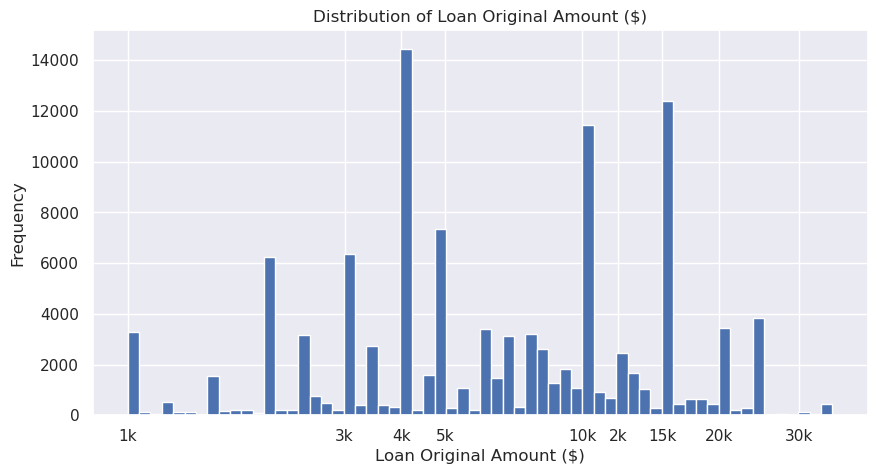

In [52]:
# Plot the loan original amount against a log scale because it has a long tail
sns.set(rc={"figure.figsize": (10, 5)})
log_binsize = 0.025
bins_log = 10 ** np.arange(
    3, np.log10(loan_data["LoanOriginalAmount"].max()) + log_binsize, log_binsize
)
plt.hist(data=loan_data, x="LoanOriginalAmount", bins=bins_log)
plt.xscale("log")
plt.xticks(
    [1e3, 12e3, 3e3, 4e3, 5e3, 1e4, 1.5e4, 2e4, 3e4],
    ["1k", "2k", "3k", "4k", "5k", "10k", "15k", "20k", "30k"],
)
plt.ylabel("Frequency")
plt.xlabel("Loan Original Amount ($)")
plt.title("Distribution of Loan Original Amount ($)");

In [53]:
# Check top 5 most demand loan amount
loan_data["LoanOriginalAmount"].value_counts()[:5]

4000     14207
15000    12232
10000    10956
5000      6953
2000      6042
Name: LoanOriginalAmount, dtype: int64

#### __Observations__

> From the above visualization, it is observed that there are three peaks at 4K, 10K, and 15K Loan Original Amount. Additional investigation proved that the most demanded loan amount by borrower is indeed 4000, 15000 and 10000 respectively.

#### __Question__
> What is the year (in quarters) that has the highest loan demands?

#### __Visualization__

In [54]:
# Define a function that changes "LoanOriginationQuarter" values from "Quarter Year" format to
# "Year Quarter" (i.e Q4 2005 to 2005 Q4)
def change_year(year):
    find_Q = year.find("Q")
    # If no Q
    if find_Q == -1:
        year = year
    else:  # Change the format
        year += " " + year[:2]
        year = year[-7:]
    return year

In [55]:
# Remove links from text with our remove_link function
loan_data["LoanOriginationQuarter"] = loan_data["LoanOriginationQuarter"].apply(
    change_year
)

In [56]:
# Change "LoanOriginationQuarter" column to datatype category
loan_data["LoanOriginationQuarter"] = loan_data["LoanOriginationQuarter"].astype(
    "category"
)

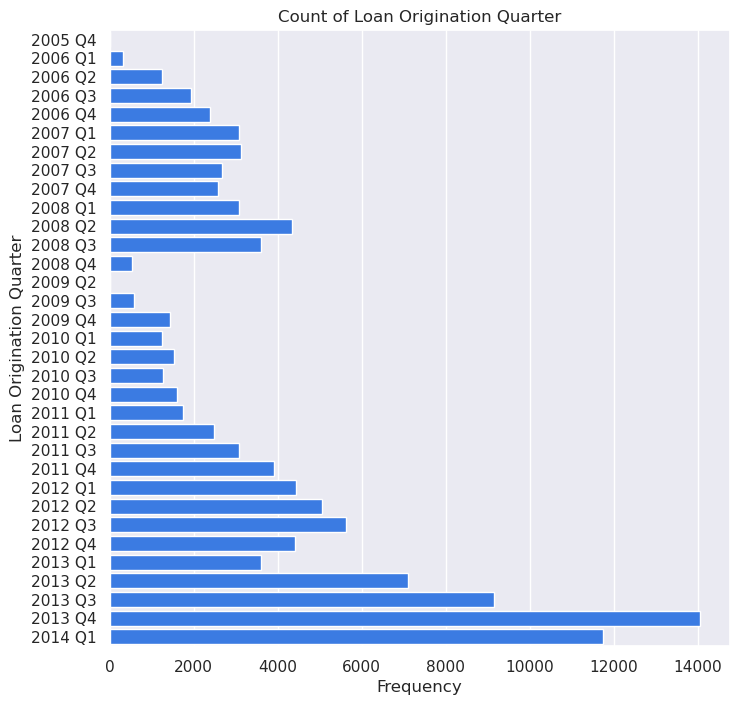

In [57]:
# Bar Chart of Loan Origination Quarter
sns.set(rc={"figure.figsize": (8, 8)})
sns.countplot(y=loan_data["LoanOriginationQuarter"], color="#1F75FE")
plt.xlabel("Frequency")
plt.ylabel("Loan Origination Quarter")
plt.title("Count of Loan Origination Quarter");

In [58]:
# Create a dataframe that shows the counts of each year quarter
Quarter = list(loan_data["LoanOriginationQuarter"].value_counts(sort=False).index)
Count = list(loan_data["LoanOriginationQuarter"].value_counts(sort=False))
Quarter_df = pd.DataFrame({"Quarter": Quarter, "Count": Count})

In [59]:
# Print the dataset of Loan Origination Quarter in ascending order with its count
Quarter_df.head()

,Quarter,Count
0,2005 Q4,22
1,2006 Q1,315
2,2006 Q2,1254
3,2006 Q3,1934
4,2006 Q4,2403


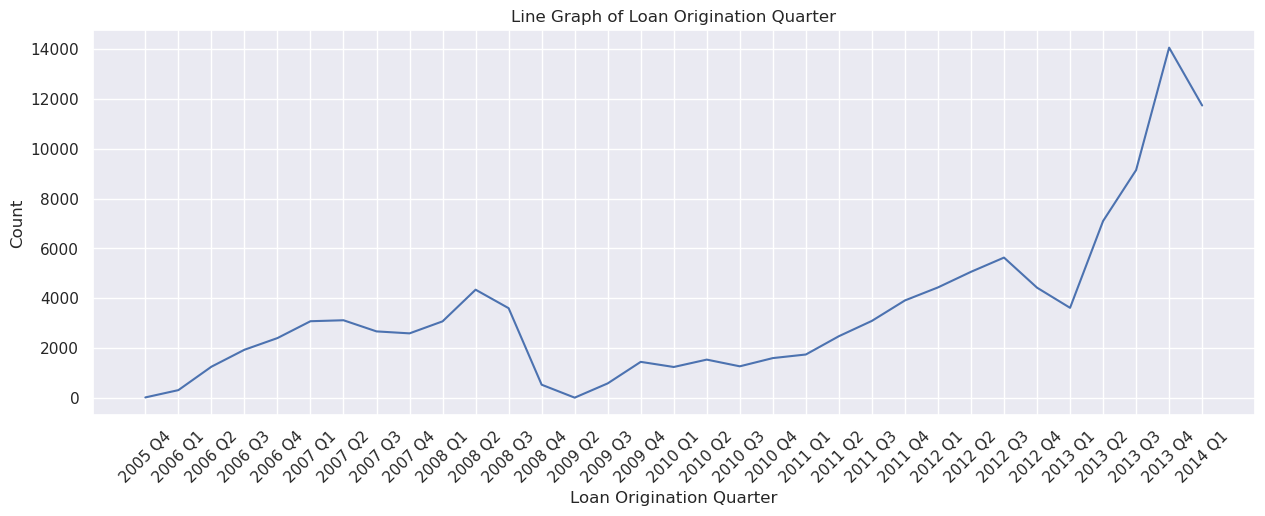

In [60]:
# Create a line graph of Loan Origination Quarter to track its changes
# over the periods of time
sns.set(rc={"figure.figsize": (15, 5)})
sns.lineplot(data=Quarter_df, x="Quarter", y="Count")
plt.xticks(rotation=45)
plt.xlabel("Loan Origination Quarter")
plt.title("Line Graph of Loan Origination Quarter");

#### __Observations__

> From the above visualization, it is observed that most of the loans were given out in the 4th Quarter of the 2013. 

#### __Question__
> What is the Distribution of Monthly Loan Payment in dollars?

#### __Visualization__

In [61]:
# Check descriptive statistics of "MonthlyLoanPayment" column
loan_data["MonthlyLoanPayment"].describe()

count    113066.000000
mean        271.932742
std         192.549979
min           0.000000
25%         130.950000
50%         217.370000
75%         370.570000
max        2251.510000
Name: MonthlyLoanPayment, dtype: float64

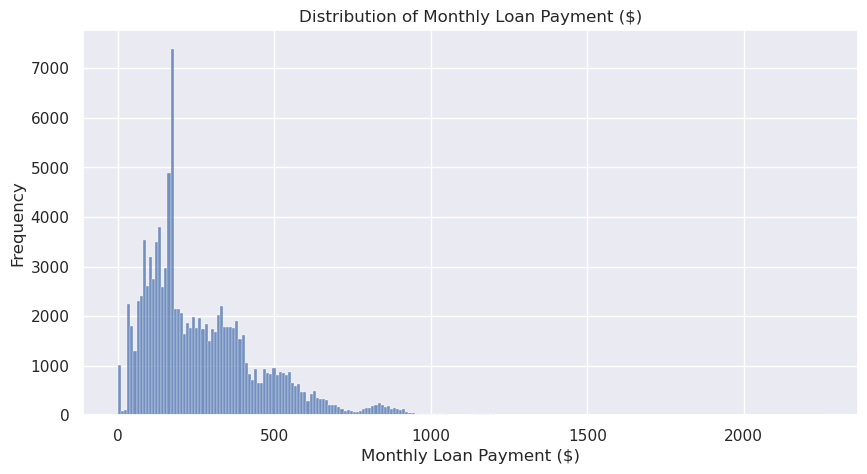

In [62]:
# Plot the loan original amount histogram
sns.set(rc={"figure.figsize": (10, 5)})
sns.histplot(data=loan_data, x="MonthlyLoanPayment")
plt.ylabel("Frequency")
plt.xlabel("Monthly Loan Payment ($)")
plt.title("Distribution of Monthly Loan Payment ($)");

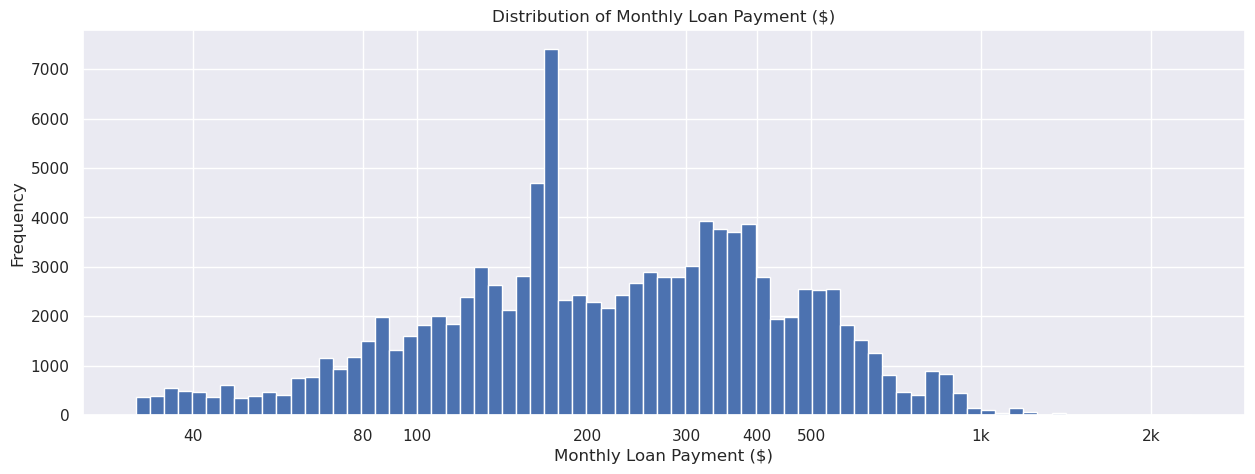

In [63]:
# Plot the Monthly Loan Payment against a log scale because it has a long tail distribution
sns.set(rc={"figure.figsize": (15, 5)})
log_binsize = 0.025
bins_log = 10 ** np.arange(
    1.5, np.log10(loan_data["MonthlyLoanPayment"].max()) + log_binsize, log_binsize
)
plt.hist(data=loan_data, x="MonthlyLoanPayment", bins=bins_log)
plt.xscale("log")
plt.xticks(
    [40, 80, 100, 200, 300, 400, 500, 1e3, 2e3],
    [40, 80, 100, 200, 300, 400, 500, "1k", "2k"],
)
plt.ylabel("Frequency")
plt.xlabel("Monthly Loan Payment ($)")
plt.title("Distribution of Monthly Loan Payment ($)");

In [64]:
# Check and print the mode of Monthly Loan Payment
payment_mode = loan_data["MonthlyLoanPayment"].mode()[0]
print(f"The mode of the Monthly Loan Payment is {payment_mode}")

The mode of the Monthly Loan Payment is 173.71


#### __Observations__

> From the above visualization, the Monthly Loan Payment is slighly left skewed with a mode of 173.71 dollars and an approximated means of 271.93 dollars.

#### __Question__
> What is the Distribution of the number of Investors on loans?

#### __Visualization__

In [65]:
# Check descriptive statistics of "MonthlyLoanPayment" column
loan_data["Investors"].describe()

count    113066.000000
mean         80.876143
std         103.340277
min           1.000000
25%           2.000000
50%          44.000000
75%         116.000000
max        1189.000000
Name: Investors, dtype: float64

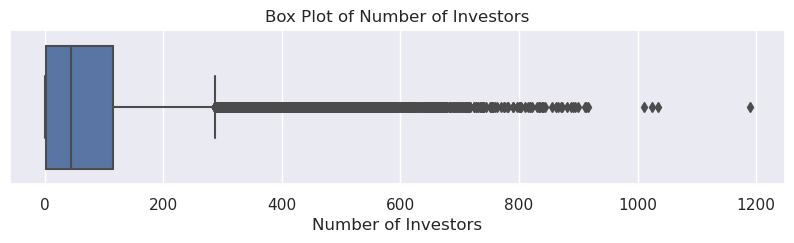

In [66]:
# Plot Investors box plot
sns.set(rc={"figure.figsize": (10, 2)})
sns.boxplot(x=loan_data["Investors"])
plt.xlabel("Number of Investors")
plt.title("Box Plot of Number of Investors");

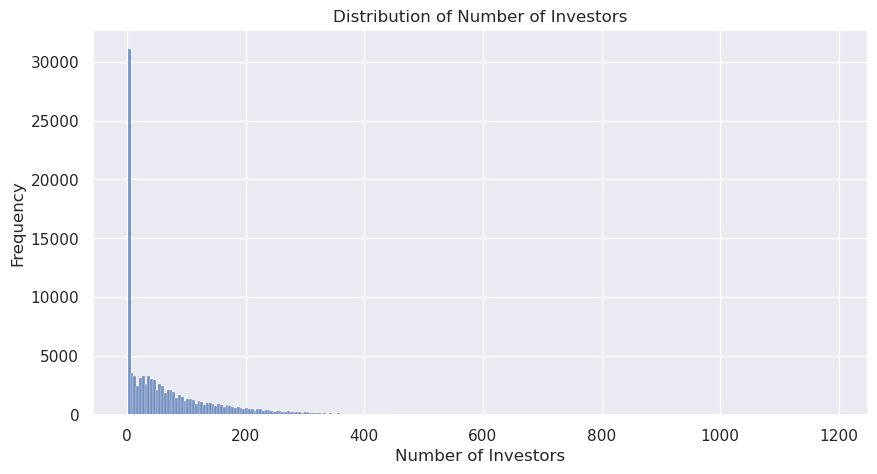

In [67]:
# Plot the loan original amount histogram
sns.set(rc={"figure.figsize": (10, 5)})
sns.histplot(data=loan_data, x="Investors")
plt.ylabel("Frequency")
plt.xlabel("Number of Investors")
plt.title("Distribution of Number of Investors");

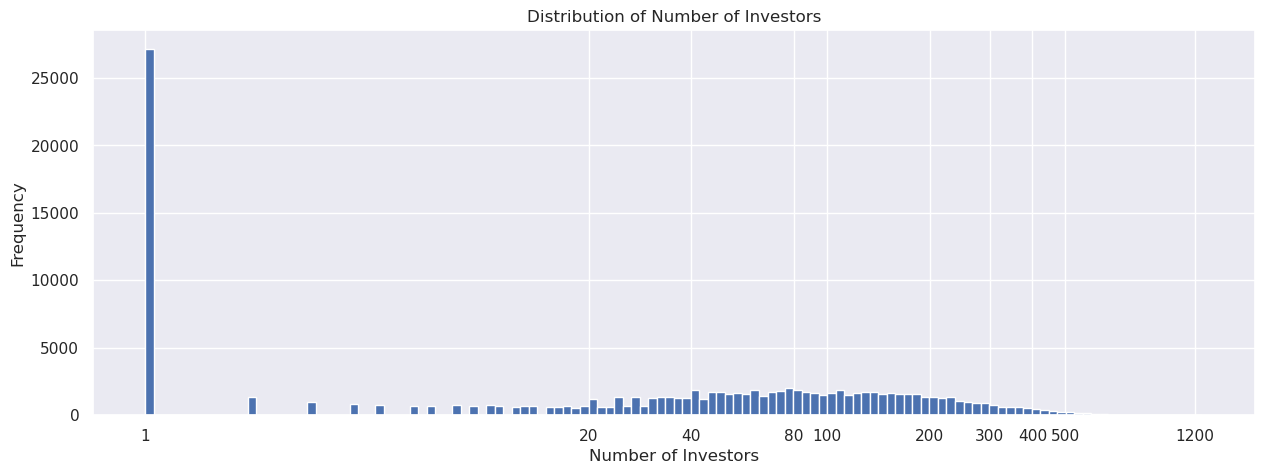

In [68]:
# Plot the Number of Investors against a log scale because it has a long tail distribution
sns.set(rc={"figure.figsize": (15, 5)})
log_binsize = 0.025
bins_log = 10 ** np.arange(
    0, np.log10(loan_data["Investors"].max()) + log_binsize, log_binsize
)
plt.hist(data=loan_data, x="Investors", bins=bins_log)
plt.xscale("log")
plt.xticks(
    [1, 20, 40, 80, 100, 200, 300, 400, 500, 1.2e3],
    [1, 20, 40, 80, 100, 200, 300, 400, 500, 1200],
)
plt.ylabel("Frequency")
plt.xlabel("Number of Investors")
plt.title("Distribution of Number of Investors");

In [69]:
# Check and print the mode of Monthly Loan Payment
payment_mode = loan_data["Investors"].mode()[0]
print(f"The mode of the Monthly Loan Payment is {payment_mode}")

The mode of the Monthly Loan Payment is 1


#### __Observations__

> From the above visualization, a large number of the loans have only one investor.

### The distributions of the variables of interest and the adjustment made on the dataset.

>The "LoanStatus" variable have categories that are similar so I put all loan status that are past due to just "Past Due" in order to make my visualization more readable.  
The "StatedMonthlyIncome" variable, I noticed that there are lots of outliers. So, I investigated it further and discovered that most of the Borrower Stated Monthly Income are not correct. For instance, how could an individual who makes `$1,750,002` per month borrow a loan of `$4000` and find it difficult to pay back the loan in a long time (row 53167 in the dataset). There are also probably other false monthly income but I only replaced the `$1,750,002` monthly income to `$175,000`. I didn't change other outliers because I don't have enough evidence to back them up but the `$1,750,002` income is too deceitful.
The "StatedMonthlyIncome", "LoanOriginalAmount" and "MonthlyLoanPayment" variables took on a large range of values, so I looked at the data using a log transform.
In the "LoanOriginationQuarter" variable I change the values from "Quarter Year" format to "Year Quarter" (i.e Q4 2005 to 2005 Q4). I also created a dataframe called `Quarter_df` to plot line graph of Loan Origination Quarter.
I also used a log transformation on the "Investors" variable. Under the transformation, the data indicate a mode of 1.

## Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables in the data. 

#### __Question__
> What is the relationship between numeric variables? First, I want to look at the pairwise correlations between features in the data. The relationships between any pair of numerical variables will be examined to determine whether they are strongly correlated.

#### __Visualization__

In [70]:
# Numerical variables
numeric_vars = [
    "BorrowerRate",
    "StatedMonthlyIncome",
    "LoanOriginalAmount",
    "MonthlyLoanPayment",
    "Investors",
]

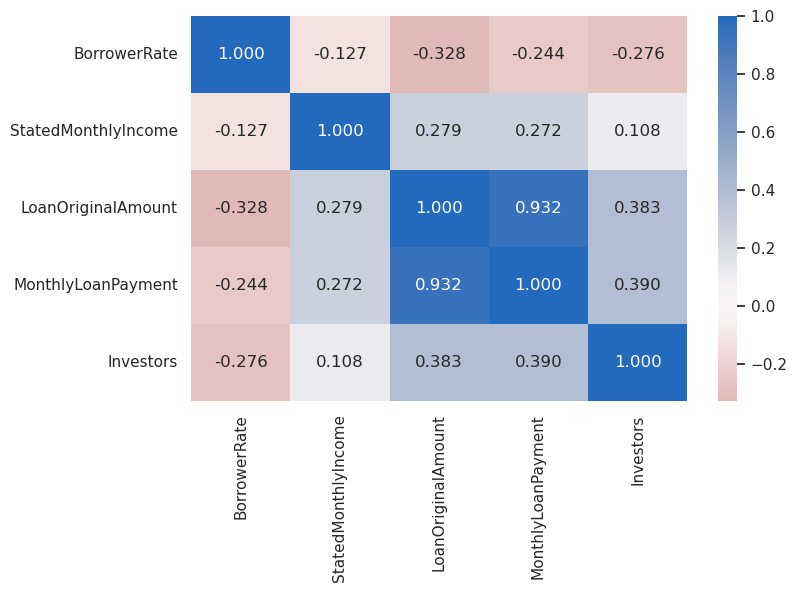

In [71]:
plt.figure(figsize=[8, 5])
sns.heatmap(
    loan_data[numeric_vars].corr(), annot=True, fmt=".3f", cmap="vlag_r", center=0
);

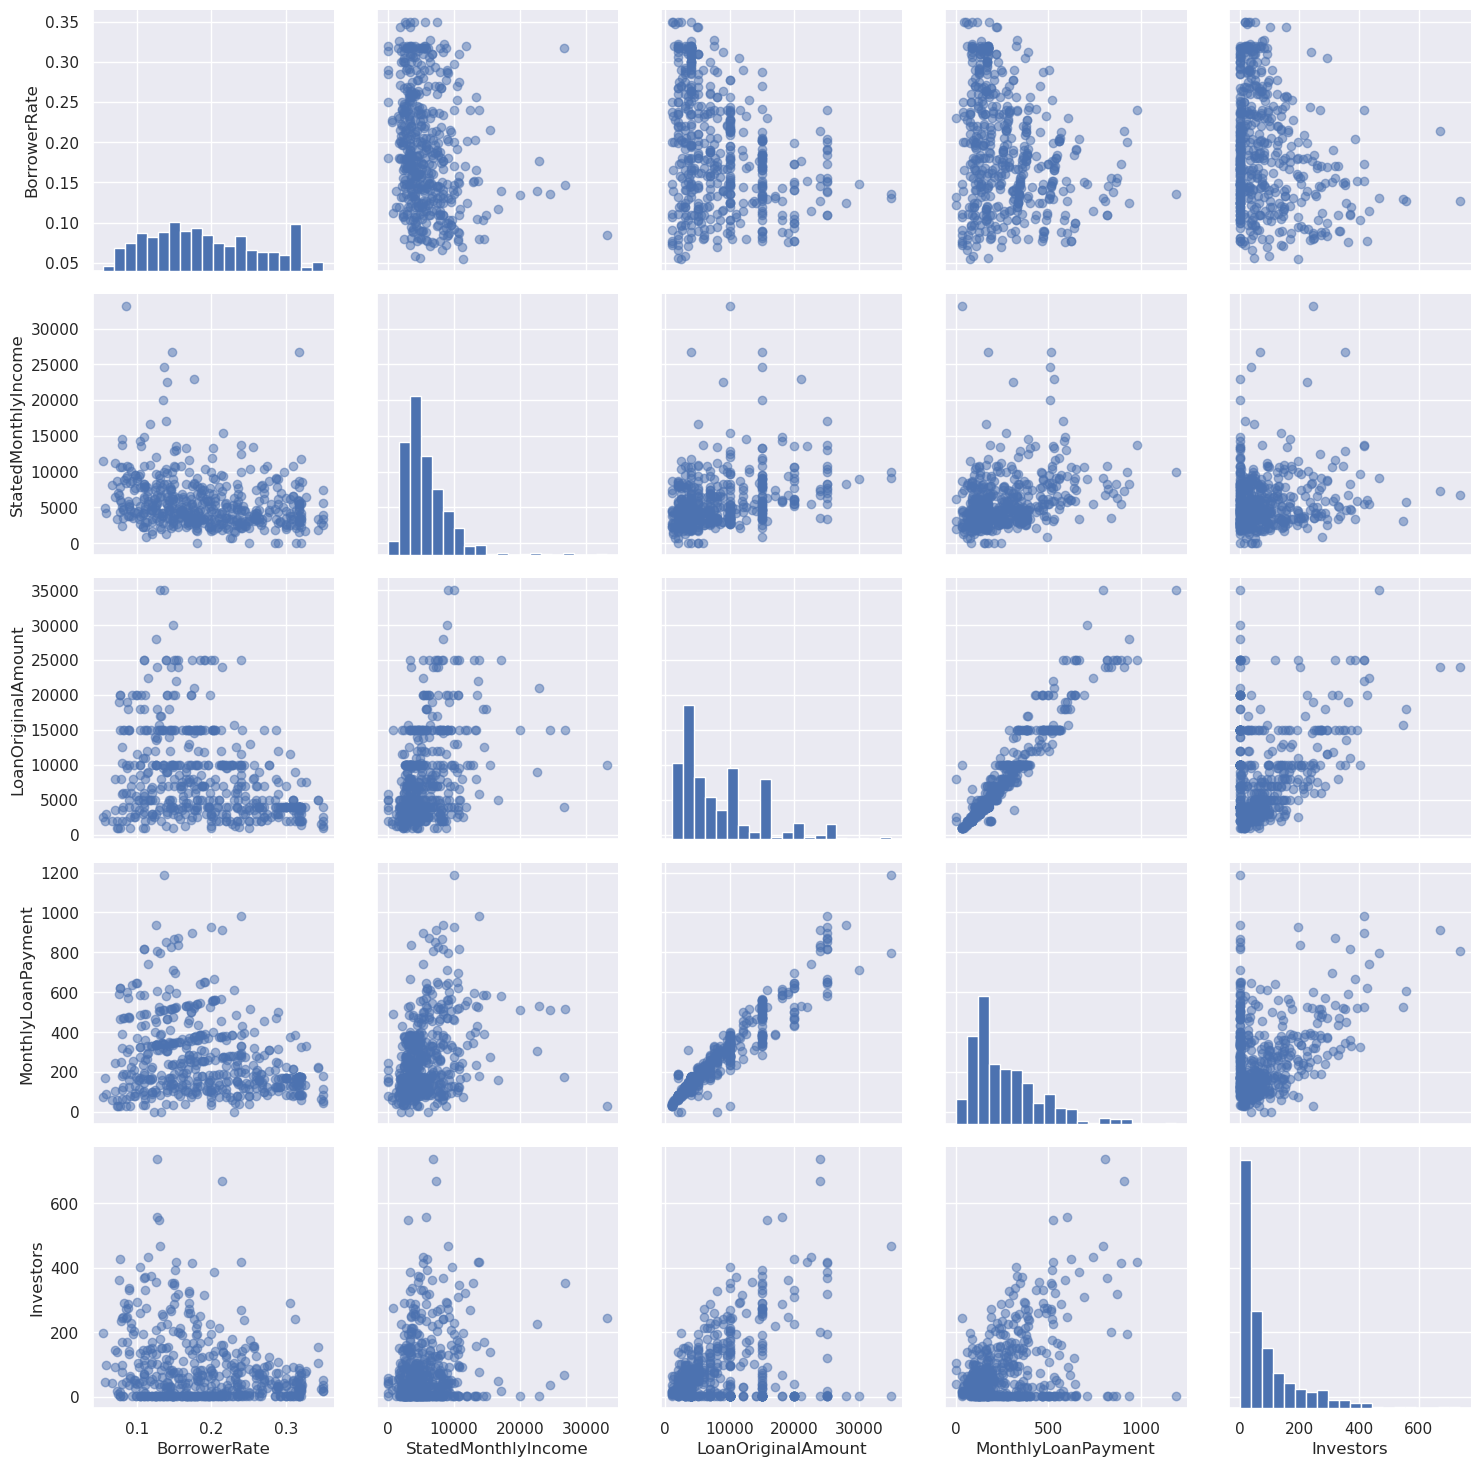

In [72]:
# plot matrix: sample 500 loans so that plots are clearer and they render faster
samples = np.random.choice(loan_data.shape[0], 500, replace=False)
df_samp = loan_data.reindex(samples)

# pair grid
g = sns.PairGrid(data=df_samp, vars=numeric_vars, height=3)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter, alpha=1 / 2);

#### __Observations__

> As expected, Loan Original Amount and Monthly Loan Payment are positively correlated with one another (The higher the Loan Original Amount the higher the expected Monthly Loan Payment). Loan Original Amount and Number of investors are slightly positively correlated. 

> On the other hand, I'm surprised that BorrowerRate is not correlated with any of the other numeric variables. 

#### __Question__

> How does Loan Original Amount changes with time (yearly quarters)?

#### __Visualization__

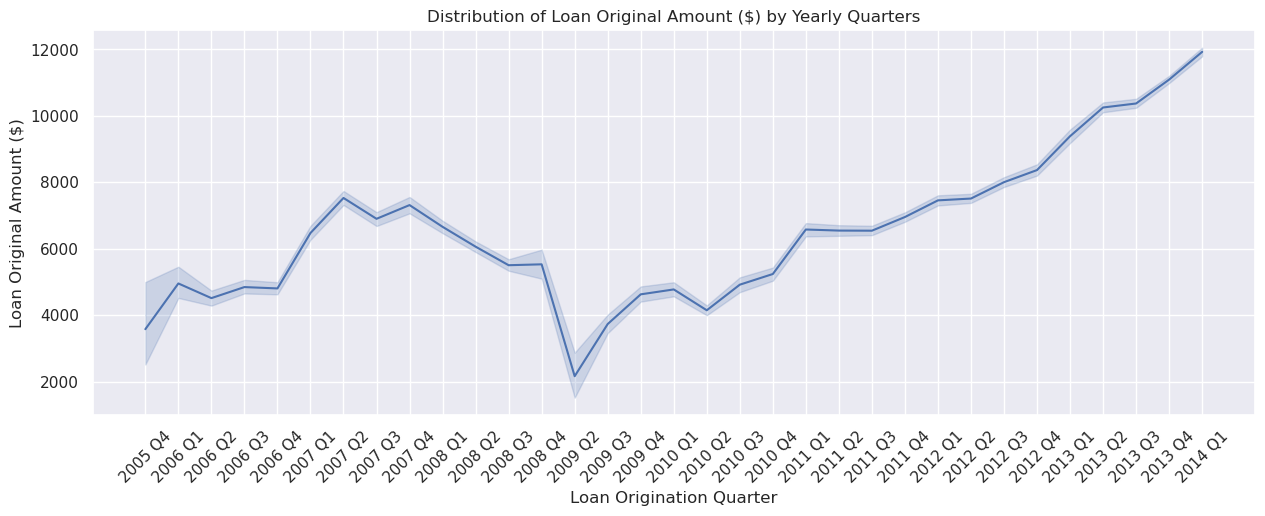

In [73]:
# Create a line graph of the Distribution of Loan Original Amount ($) by Yearly Quarters
sns.set(rc={"figure.figsize": (15, 5)})
sns.lineplot(data=loan_data, x="LoanOriginationQuarter", y="LoanOriginalAmount")
plt.xticks(rotation=45)
plt.xlabel("Loan Origination Quarter")
plt.ylabel("Loan Original Amount ($)")
plt.title("Distribution of Loan Original Amount ($) by Yearly Quarters");

__Observations__

> The visualuzation show a huge decrease of loans amount between the forth quarter of the year 2008 and the second quarter of the year 2009 which I investigated further and realied it was due to the Financial Crisis in the US during those period. The amount of loans also increases by year from the year 2010 to year 2014.

#### __Question__

> What is distribution of loans by state?

#### __Observation__

In [74]:
# Group loan dataset by "BorrowerState"
groupby_state = loan_data.groupby(["BorrowerState"]).sum()

In [75]:
# Sort the grouped loan dataset by "LoanOriginalAmount"
groupby_state.sort_values(by="LoanOriginalAmount", ascending=False, inplace=True)

In [76]:
# Store the states in order in a list called "states"
states = groupby_state.index

In [77]:
# Store the total loan amount of each state in descending order in a list called total_loan_amount
total_loan_amount = groupby_state["LoanOriginalAmount"].tolist()

In [78]:
# Create a dataframe of states and Total Loan Amount ($)
total_loan_by_state = pd.DataFrame(
    {"State": states, "Total Loan Amount ($)": total_loan_amount}
)

In [79]:
# Display dataset top 4 data
total_loan_by_state.head()

,State,Total Loan Amount ($)
0,CA,130687003
1,TX,61473588
2,NY,58685338
3,FL,54652485
4,IL,49128807


In [80]:
loan_data["LoanOriginalAmount"].sum()

940116915

In [81]:
# Total amount of loans that went to CA
CA_amount = int(
    total_loan_by_state[total_loan_by_state["State"] == "CA"]["Total Loan Amount ($)"]
)
# Total amount of loan given out by the company
Total = loan_data["LoanOriginalAmount"].sum()

In [82]:
print(f"The total amount of loans given out by the loan company is ${Total}")

The total amount of loans given out by the loan company is $940116915


In [83]:
# Print the percentage of loans given to individual from CA
print(
    f"The percentage of money that went to California is approximately {round((CA_amount/Total)*100, 1)}%"
)

The percentage of money that went to California is approximately 13.9%


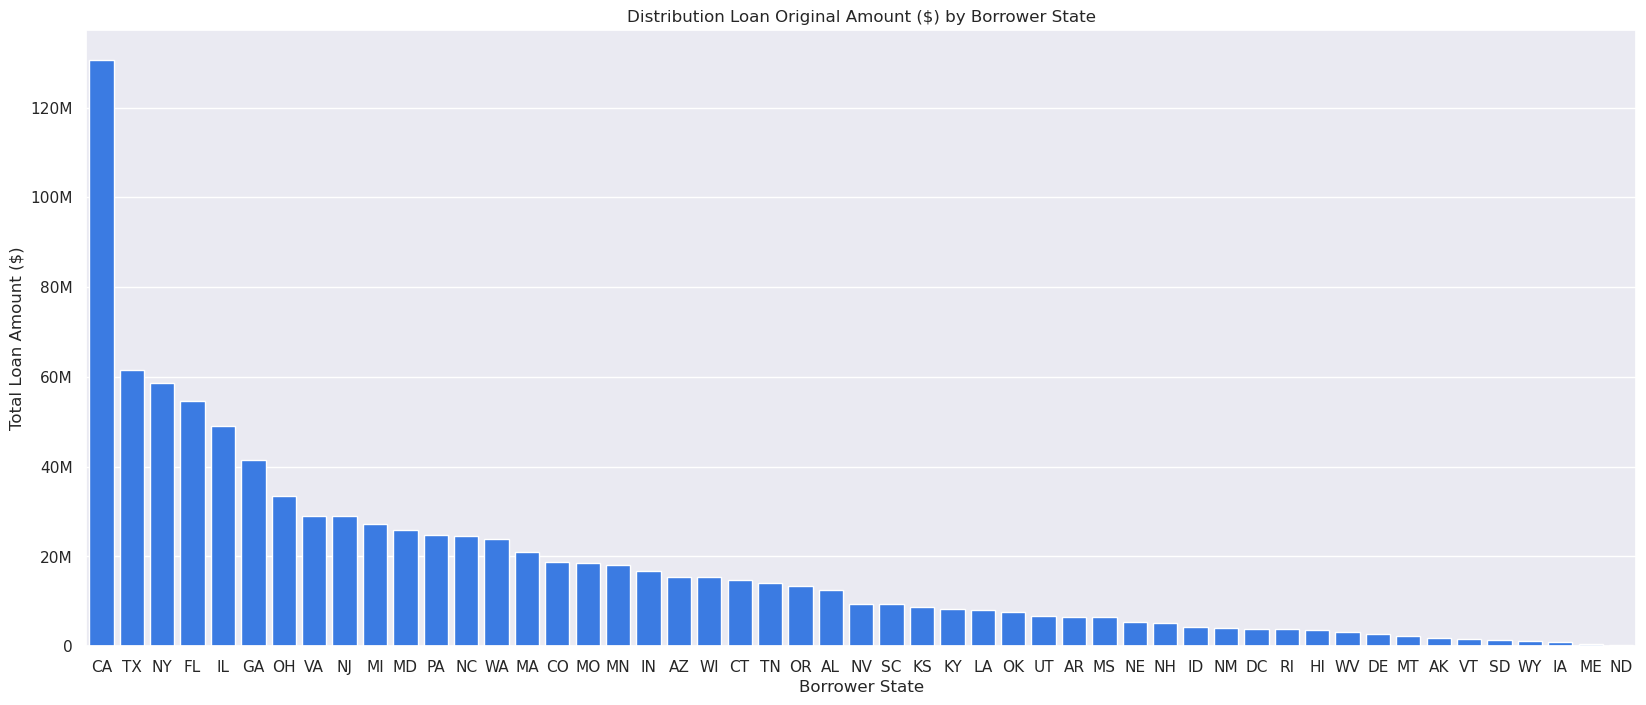

In [84]:
# Bar Chart of Total Loan Amount ($) by Borrower State
sns.set(rc={"figure.figsize": (20, 8)})
sns.barplot(
    data=total_loan_by_state, x="State", y="Total Loan Amount ($)", color="#1F75FE"
)
plt.title("Distribution Loan Original Amount ($) by Borrower State")
plt.xlabel("Borrower State")
plt.yticks(
    [0, 0.2e8, 0.4e8, 0.6e8, 0.8e8, 1e8, 1.2e8],
    [0, "20M", "40M", "60M", "80M", "100M", "120M"],
);

#### __Observations__

> From the above analysis and visualization of the data. Most of the borrowers are from `California (CA)` and total amount of loans that went to the state is `$130,687,003` amounting to approximately `13.9%` of the total amount loan `($940,116,915)` given out by the company.

#### __Question__

> How does Borrower Rate changes with time (by year)?

To investigate this; I will create a new dataframe called `new_loan_data` that will contain the loan origination date with day, months and year in separated columns. This new dataset could be useful in the Multivariate Exploration.

#### __Visualization__

In [85]:
# Create the "new_loan_data" dataframe
new_loan_data = pd.DataFrame(
    {
        "DayName": loan_data.LoanOriginationDate.dt.day_name(),
        "Month": loan_data.LoanOriginationDate.dt.month,
        "Day": loan_data.LoanOriginationDate.dt.day,
        "Year": loan_data.LoanOriginationDate.dt.year,
        "Term": loan_data.Term,
        "LoanStatus": loan_data.LoanStatus,
        "BorrowerRate": loan_data.BorrowerRate,
        "BorrowerState": loan_data.BorrowerState,
        "IncomeVerification": loan_data.IncomeVerifiable,
        "StatedMonthlyIncome": loan_data.StatedMonthlyIncome,
        "LoanOriginalAmount": loan_data.LoanOriginalAmount,
        "MonthlyLoanPayment": loan_data.MonthlyLoanPayment,
        "Investors": loan_data.Investors,
    }
)

In [86]:
# Change True and False to Verified and Unverified respectively in "IncomeVerification" column
new_loan_data.IncomeVerification.replace(
    [True, False],
    ["Verified", "Unverified"],
    inplace=True,
)

In [87]:
# Replace number 1 to 12 with Jan to Dec
new_loan_data.Month.replace(
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    [
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sept",
        "Oct",
        "Nov",
        "Dec",
    ],
    inplace=True,
)

In [88]:
# Change DayName column to categorical datatype
new_loan_data["DayName"] = pd.Categorical(
    new_loan_data.DayName,
    categories=[
        "Sunday",
        "Monday",
        "Tuesday",
        "Wednesday",
        "Thursday",
        "Friday",
        "Saturday",
    ],
    ordered=True,
)

In [89]:
# Change Month column to categorical datatype
new_loan_data["Month"] = pd.Categorical(
    new_loan_data.Month,
    categories=[
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sept",
        "Oct",
        "Nov",
        "Dec",
    ],
    ordered=True,
)

In [90]:
# First 3 rows of the new dataset
new_loan_data.head(3)

,DayName,Month,Day,Year,Term,LoanStatus,BorrowerRate,BorrowerState,IncomeVerification,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,Investors
0,Wednesday,Sept,12,2007,36,Completed,0.158,CO,Verified,3083,9425,330.43,258
1,Monday,Mar,3,2014,36,Current,0.092,CO,Verified,6125,10000,318.93,1
2,Wednesday,Jan,17,2007,36,Completed,0.275,GA,Verified,2083,3001,123.32,41


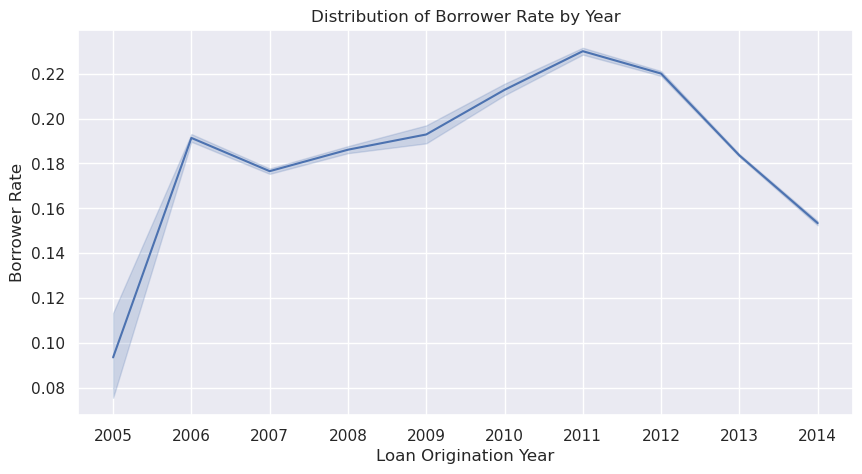

In [91]:
# Create a line graph of the Distribution of Borrower Rate by Year
sns.set(rc={"figure.figsize": (10, 5)})
sns.lineplot(data=new_loan_data, x="Year", y="BorrowerRate")
plt.xticks(sorted(new_loan_data.Year.unique()))
plt.xlabel("Loan Origination Year")
plt.ylabel("Borrower Rate")
plt.title("Distribution of Borrower Rate by Year");

#### __Observations__

> The above visualuzation show a huge increase in Borrower Rate from the year 2005 to year 2006 and a decreases from the year 2011 to year 2014.

### The relationships observed in the Bivariate investigation and how the features of interest vary with one another.

> The objective of this investigation is to know how the loan given out by the loan company is distributed and how loan original amount and borrower rate changes with time.
> - Loan Original Amount and Monthly Loan Payment are positively correlated with one another (The higher the Loan Original Amount the higher the expected Monthly Loan Payment). Loan Original Amount and Number of investors are slightly positively correlated. I also noticed that BorrowerRate is not correlated with any of the other numeric variables as I expected it to be correlated with loan amount.
> - I observed a huge decrease of loans amount between the forth quarter of the year 2008 and the second quarter of the year 2009 (This is due to the Financial Crisis in the US during this period). The amount of loans also increases by year from the 2010 to 2014.
> - I also noticed that most of the borrowers are from California (CA) and total amount of loans that went to the state is `$130,687,003` amounting to approximately 13.9% of the total amount loan `($940,116,915)` given out by the company.
> - I also investigated how Borrower Rate changes with year and I observed a huge increase in Borrower Rate from the year 2005 to year 2006 and a decreases from the year 2011 to year 2014.

### Observed interesting relationships between the other features (not the main features of interest)

> I oberved that the more popular the state, the larger the amount of loan given to borrower from the state. 

## Multivariate Exploration

> In this section, the focus is to investigate further by Creating plots of three or more variables to investigate how loans are distributes with time.

#### __Question__

> What is the relationship between Loan Original Amount, Loan Origination Year and Term?

#### __Visualization__

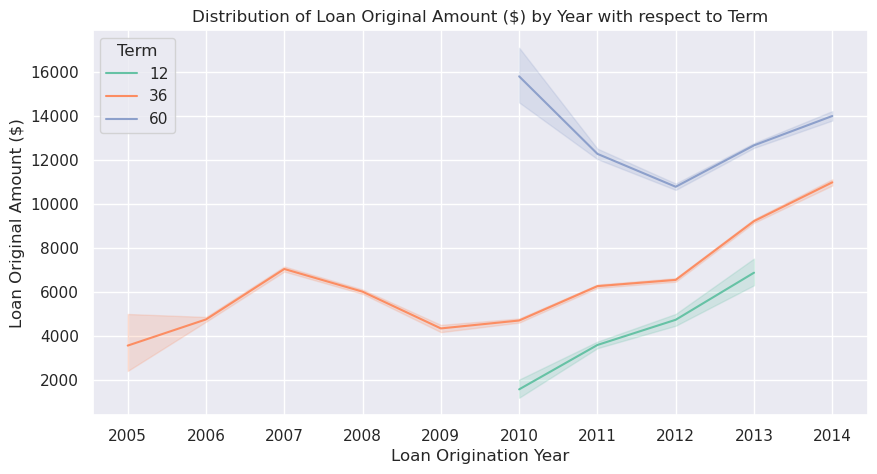

In [92]:
# Graph of Loan Original Amount ($) by Year with respect to Term
sns.set_palette("PuBuGn_d")
sns.set(rc={"figure.figsize": (10, 5)})
sns.lineplot(
    data=new_loan_data,
    x="Year",
    y="LoanOriginalAmount",
    hue="Term",
    palette="Set2",
)
plt.xlabel("Loan Origination Year")
plt.xticks(sorted(new_loan_data.Year.unique()))
plt.ylabel("Loan Original Amount ($)")
plt.title("Distribution of Loan Original Amount ($) by Year with respect to Term");

__Observations__

> The visualuzation above shows that 12 months and 60 months loan terms were introduced in the year 2010 and 12 months loans were later stoped in the year 2013 with increase in 12 months loan terms within the period. It also shows the increasing in demand of loans from the year 2012 for all loan terms.

#### __Question__

> What is the relationship between Loan Original Amount, Loan Origination Year and Income Verification

#### __Visualization__

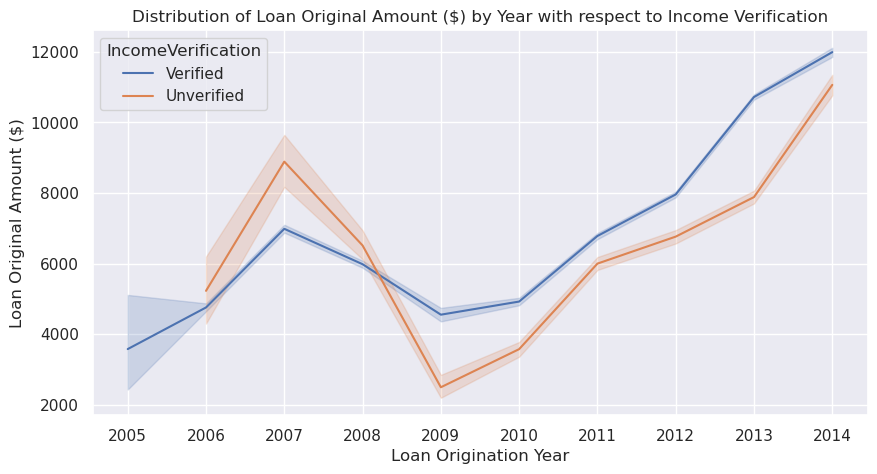

In [93]:
# Create a line graph of the Distribution of Borrower Rate by Year
sns.set(rc={"figure.figsize": (10, 5)})
sns.lineplot(
    data=new_loan_data, x="Year", y="LoanOriginalAmount", hue="IncomeVerification"
)
plt.xlabel("Loan Origination Year")
plt.xticks(sorted(new_loan_data.Year.unique()))
plt.ylabel("Loan Original Amount ($)")
plt.title(
    "Distribution of Loan Original Amount ($) by Year with respect to Income Verification"
);

__Observations__

> The visualuzation above shows that the introduction of the approval of unverified loans was from the year 2006 with a increase in the loan amount from the year to the year 2006. It also shows that more of the loans are given out to borrowers with verified income amount.

#### __Question__

> What is the relationship between Loan Original Amount, Loan Origination Month and Income Verification

#### __Visualization__

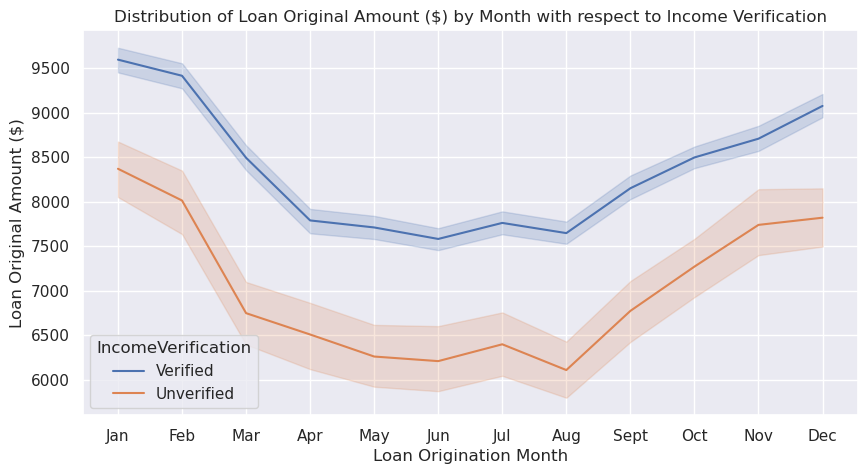

In [94]:
# Create a line graph of the Distribution of Borrower Rate by Year
sns.set(rc={"figure.figsize": (10, 5)})
sns.lineplot(
    data=new_loan_data, x="Month", y="LoanOriginalAmount", hue="IncomeVerification"
)
plt.xlabel("Loan Origination Month")
plt.ylabel("Loan Original Amount ($)")
plt.title(
    "Distribution of Loan Original Amount ($) by Month with respect to Income Verification"
);

__Observations__

> The visualuzation show that most of the loans are given out to borrowers with verified income amount. It also shows a decrease in loan amount from January to June and Increase from August to December.

#### __Question__

> What is the relationship between Loan Original Amount and Monthly Loan Payment with repect to Year?

#### __Visualization__

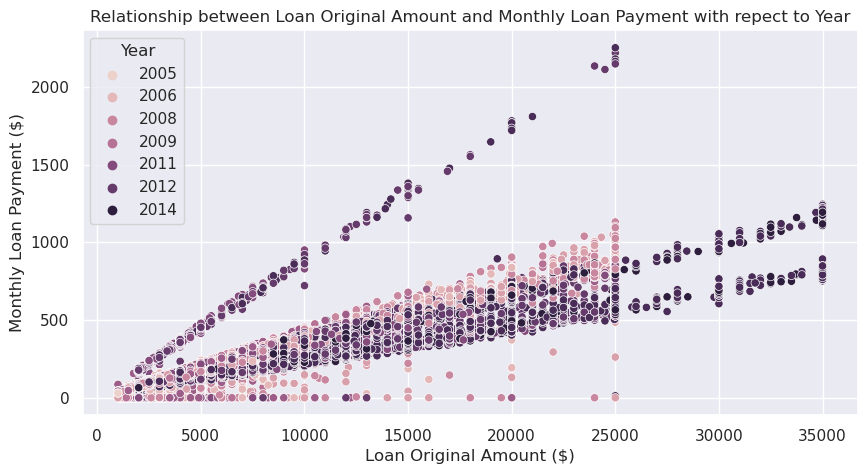

In [95]:
# Scatterplot of the Relationship between Loan Original Amount and Monthly Loan Payment with repect to Year
sns.scatterplot(
    data=new_loan_data, x="LoanOriginalAmount", y="MonthlyLoanPayment", hue="Year"
)
plt.xlabel("Loan Original Amount ($)")
plt.ylabel("Monthly Loan Payment ($)")
plt.title(
    "Relationship between Loan Original Amount and Monthly Loan Payment with repect to Year"
);

__Observations__

> The above visualuzation show a positive correlation between Loan Original Amount and Monthly Loan Payment and an increase in Loan Original Amount and Monthly Loan Payment by Year.

### Observed interesting relationships between features in this part of the investigation.

> - I observed that 12 months and 60 months loan terms were introduced in the year 2010 and 12 months loans were later stoped in the year 2013 with increase in 12 months loan terms within the period. It also shows the increasing in demand of loans from the year 2012 for all loan terms.
> - The introduction of the approval of unverified loans was from the year 2006 with a increase in the loan amount from the year to the year 2006. It also shows that more of the loans are given out to borrowers with verified income amount.
> - Most of the loans are given out to borrowers with verified income amount. It also shows a decrease in loan amount from January to June and Increase from August to December.
> - There is a positive correlation between Loan Original Amount and Monthly Loan Payment and increase in Loan Original Amount and Monthly Loan Payment by Year.

### Interesting or surprising interactions between features

> I found out that 12 months and 60 months loan terms were just introduced in the year 2010 and 12 months loans were later stoped in the year 2013. I think is was because most borrowers were not able to pay there loans during this period, so, the company have to stop 12 months loan terms.

## Conclusions
The data of Prosper (the first peer-to-peer lending marketplace in the United States) data from the 4th Quarter of the year 2005 to the 1st Quarter of the year 2014 were analyzed to answer several questions.

The data exploration resulted in an understanding of all the data's features, and I then proceeded to wrangle and clean up the data according to my proposed use. 

Below, I will write a summary of the main findings and reflect on the steps taken during the data exploration.

First, I started with Univariate Exploration to investigate distributions of individual variables. The "LoanStatus" variable has similar categories so I put all loan statuses that are past due to just "Past Due" to make my visualization more readable. I will explain my observations as follows. In the "StatedMonthlyIncome" variable, I noticed that there are lots of outliers. So, I investigated it further and discovered that most of the Borrower Stated Monthly Income is not correct. For instance, how could an individual who makes `$1,750,002` per month borrow a loan of `$4000` and find it difficult to pay back the loan over a long time (row 53167 in the dataset)? There are also probably other false monthly incomes but I only replaced the `$1,750,002` monthly income with `$175,000`. I didn't change other outliers because I don't have enough evidence to back them up but the `$1,750,002` income is too deceitful. The "StatedMonthlyIncome", "LoanOriginalAmount" and "MonthlyLoanPayment" variables took on a large range of values, so I looked at the data using a log transform. In the "LoanOriginationQuarter" variable I change the values from "Quarter Year" format to "Year Quarter" (i.e Q4 2005 to 2005 Q4). I also created a dataframe called `Quarter_df` to plot a line graph of the Loan Origination Quarter. I also used a log transformation on the "Investors" variable. Under the transformation, the data indicate a mode of 1.

Secondly, I moved on to Bivariate Exploration to investigate relationships between pairs of variables in the data. The relationships observed in the Bivariate investigation and how the features of interest vary with one another. The objective of this section investigation is to know how the loan given out by the loan company is distributed and how the loan's original amount and borrower rate change with time. I will explain my observations as follows. Loan Original Amount and Monthly Loan Payment are positively correlated with one another (The higher the Loan Original Amount the higher the expected Monthly Loan Payment). The Loan Original Amount and the Number of investors are slightly positively correlated. I also noticed that BorrowerRate is not correlated with any of the other numeric variables as I expected it to be correlated with the loan amount. I observed a huge decrease in loans amount between the fourth quarter of the year 2008 and the second quarter of the year 2009 (This is due to the Financial Crisis in the US during this period). The amount of loans also increases by year from 2010 to 2014. I also noticed that most of the borrowers are from California (CA) and the total amount of loans that went to the state is `$130,687,003` amounting to approximately 13.9% of the total amount of loans `($940,116,915)` given out by the company. I also investigated how the Borrower Rate changes with the year and I observed a huge increase in Borrower Rate from the year 2005 to the year 2006 and a decrease from the year 2011 to the year 2014.

In conclusion, I proceeded to Multivariate Exploration investigate further by Creating plots of three or more variables to investigate how loans are distributed with time. My Observed interesting relationships between features in this part of the investigation are as follows. I observed that 12 months and 60 months loan terms were introduced in the year 2010 and 12 months loans were later stopped in the year 2013 with an increase in 12 months loan terms within the period. It also shows the increase in demand for loans from the year 2012 for all loan terms. The introduction of the approval of unverified loans was from the year 2006 with an increase in the loan amount from the year to the year 2006. It also shows that more of the loans are given out to borrowers with verified income amounts. Most of the loans are given out to borrowers with verified income amounts. It also shows a decrease in loan amount from January to June and an Increase from August to December. There is a positive correlation between Loan Original Amount and Monthly Loan Payment and an increase in Loan Original Amount and Monthly Loan Payment by Year. I also found out that 12 months and 60 months loan terms were just introduced in the year 2010 and 12 months loans were later stopped in the year 2013. I think it was because most borrowers were not able to pay their loans during this period, so, the company have to stop 12 months of loan terms.